# Lecture 10 - Spring 2024

Data Science, Spring 2024

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [6]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
df = pd.read_csv("/content/house_prices.csv")
df

,area,bedrooms,bathrooms,floors,price
0,1360,2,1,2,75561.009869
1,4272,3,3,1,197449.640308
2,3592,1,2,1,180621.795096
3,966,1,2,2,45234.416477
4,4926,2,1,2,232342.452693
...,...,...,...,...,...
995,3261,4,1,2,164587.880099
996,3179,1,2,1,156818.403658
997,2606,4,2,1,135836.079275
998,4723,5,2,2,234621.268790


# 1st Task

We will first define some helper functions to calculate the regression line for us. Apply these helper funtions on house price dataset and compare with your previous model (you built using sklearn built-in funtions).

In [9]:
# Helper functions
# define standard unit function
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

# define correlation function
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))
# define slope function
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

# define intercept function
def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

# define fit_least_squares function
def fit_least_squares(x, y):
    theta_1 = slope(x, y)
    theta_0 = intercept(x, y)

     # code here
    return theta_0, theta_1

# define predict function
def predict(x, theta_0, theta_1):
    # code Here
    return y_hat


# define mse function
def compute_mse(y, yhat):
  # Here code
  return mse


# 2nd Task
Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

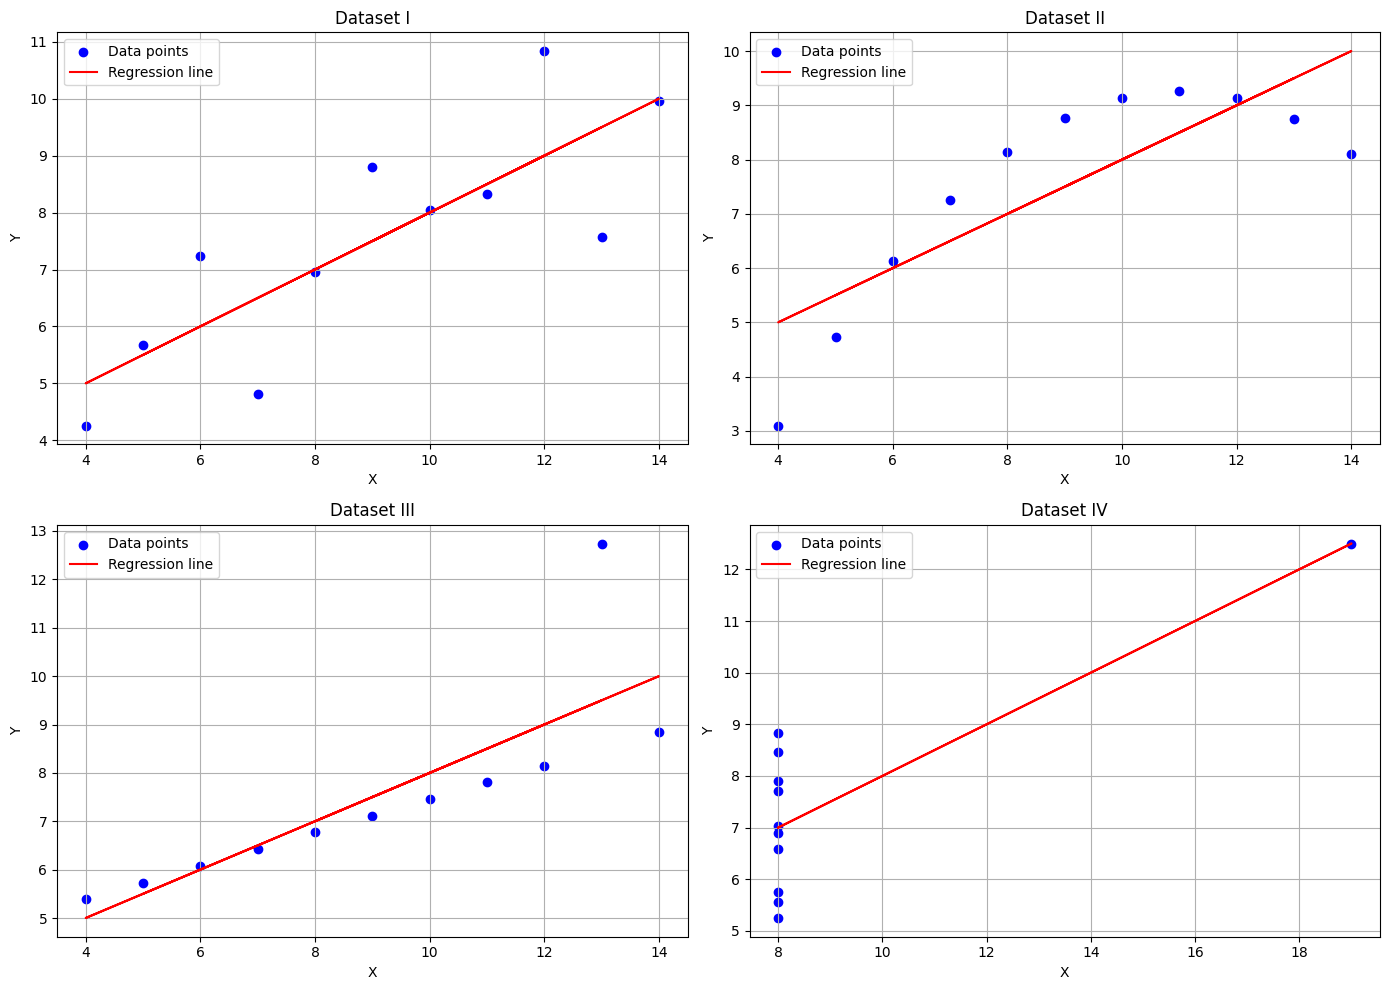

Dataset I: Slope (coefficient) = 0.5000909090909093, Intercept = 3.0000909090909094
Dataset II: Slope (coefficient) = 0.5, Intercept = 3.00090909090909
Dataset III: Slope (coefficient) = 0.4997272727272728, Intercept = 3.002454545454545
Dataset IV: Slope (coefficient) = 0.49990909090909097, Intercept = 3.0017272727272726


In [18]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create dataframes
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
x4 = np.array(x4)
y4 = np.array(y4)
x = x.reshape(-1, 1)
x4 = x4.reshape(-1, 1)
# apply SLR model on these four Datasets
models = []
datasets = [(x, y1), (x, y2), (x, y3), (x4, y4)]

for x_data, y_data in datasets:
    model = LinearRegression()
    model.fit(x_data, y_data)
    models.append(model)

# Visualize the datasets and regression lines
plt.figure(figsize=(14, 10))
titles = ["Dataset I", "Dataset II", "Dataset III", "Dataset IV"]

for i, (x_data, y_data, model) in enumerate(zip([x, x, x, x4], [y1, y2, y3, y4], models)):
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_data, y_data, color='blue', label='Data points')
    plt.plot(x_data, model.predict(x_data), color='red', label='Regression line')
    plt.title(titles[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print model coefficients and intercepts
for i, model in enumerate(models):
    print(f"{titles[i]}: Slope (coefficient) = {model.coef_[0]}, Intercept = {model.intercept_}")


In [20]:
# print values of both parameters (slope, intercept) for all these Datasets
slope_intercept = []
for i, model in enumerate(models):
    slope = model.coef_[0]
    intercept = model.intercept_
    slope_intercept.append((slope, intercept))
    print(f"{titles[i]}: Slope = {slope}, Intercept = {intercept}")

Dataset I: Slope = 0.5000909090909093, Intercept = 3.0000909090909094
Dataset II: Slope = 0.5, Intercept = 3.00090909090909
Dataset III: Slope = 0.4997272727272728, Intercept = 3.002454545454545
Dataset IV: Slope = 0.49990909090909097, Intercept = 3.0017272727272726


Looks like all four datasets have exactly the same fit.

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [28]:
# Define NO_VIZ as a constant (assuming it's used to control visualization)
NO_VIZ = False

# Define a placeholder function for least_squares_evaluation
def least_squares_evaluation(x, y, visualize=True):
    """
    This is a placeholder function.
    Replace this with the actual implementation of your least squares evaluation.
    """
    # Placeholder - replace with actual calculations
    slope = 1
    intercept = 0

    if visualize:
        # Placeholder - replace with actual visualization code
        plt.scatter(x, y)
        plt.plot(x, slope * x + intercept, color='red')
        plt.show()

    return None  # Replace with actual return value if needed

for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = sns.load_dataset('anscombe') # Load the anscombe dataset from seaborn
    ans = ans[ans['dataset'] == dataset] # Filter to just the rows for the current dataset
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize=NO_VIZ)
    print()
    print()

>>> Dataset I:


>>> Dataset II:


>>> Dataset III:


>>> Dataset IV:




However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

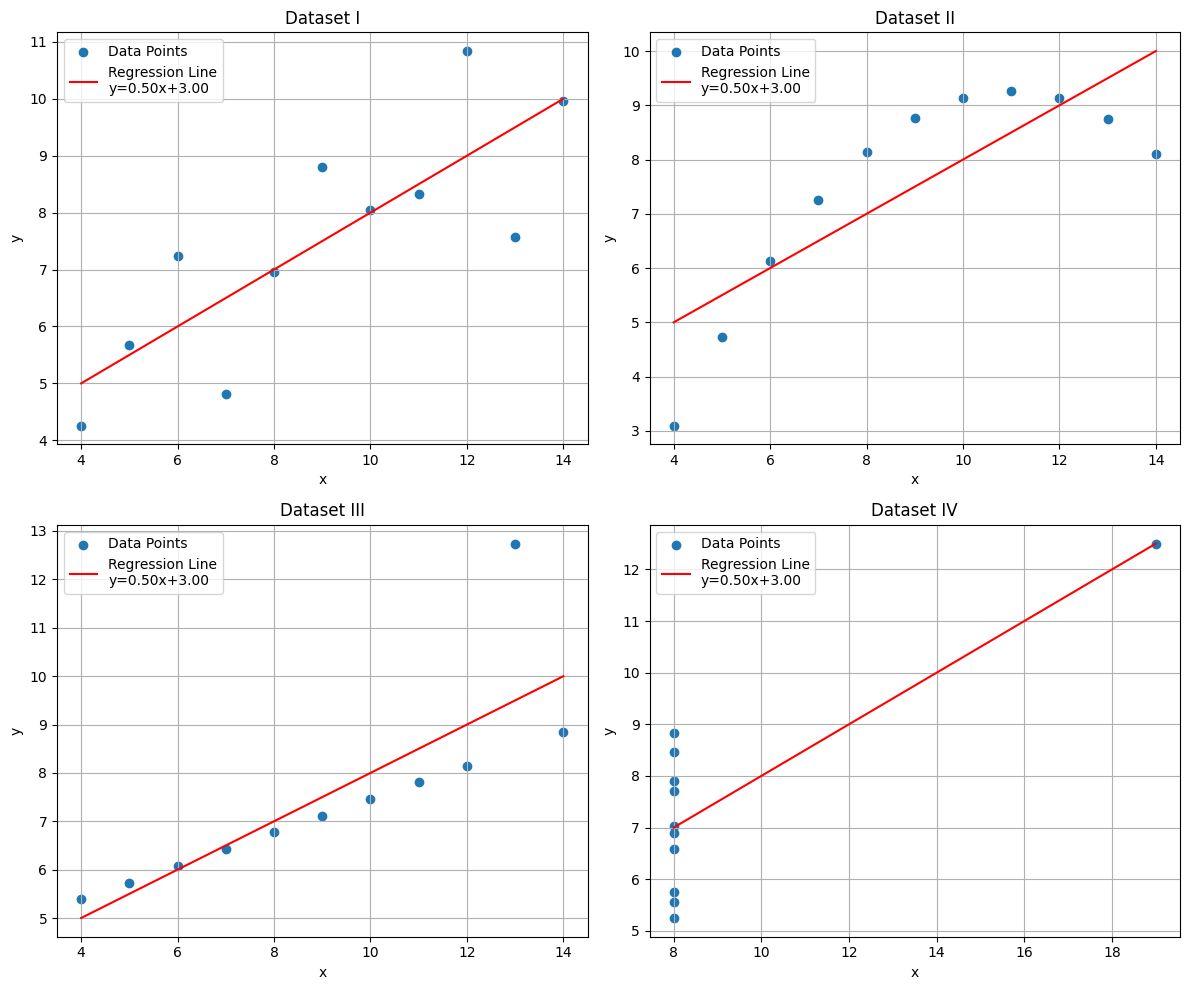

In [30]:
# visualize all four datasets
# Load the Anscombe dataset
anscombe_data = sns.load_dataset('anscombe')

# Define the least squares evaluation function
def least_squares_evaluation(x, y):
    """
    Perform least squares linear regression and return slope and intercept.

    Parameters:
    - x: The independent variable data (numpy array or list).
    - y: The dependent variable data (numpy array or list).

    Returns:
    - slope: The slope of the linear regression line.
    - intercept: The intercept of the linear regression line.
    """
    # Reshape x for sklearn
    x_reshaped = np.array(x).reshape(-1, 1)

    # Create and fit the model
    model = LinearRegression()
    model.fit(x_reshaped, y)

    # Extract slope and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept

# Prepare the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
titles = ['Dataset I', 'Dataset II', 'Dataset III', 'Dataset IV']

# Visualize each dataset
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    # Filter data for the current dataset
    current_data = anscombe_data[anscombe_data['dataset'] == dataset]
    x = current_data['x']
    y = current_data['y']

    # Perform least squares evaluation
    slope, intercept = least_squares_evaluation(x, y)

    # Plot the data points
    axes[i].scatter(x, y, label='Data Points')

    # Plot the regression line
    x_values = np.array([min(x), max(x)])
    y_values = slope * x_values + intercept
    axes[i].plot(x_values, y_values, color='red', label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}')

    # Add title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

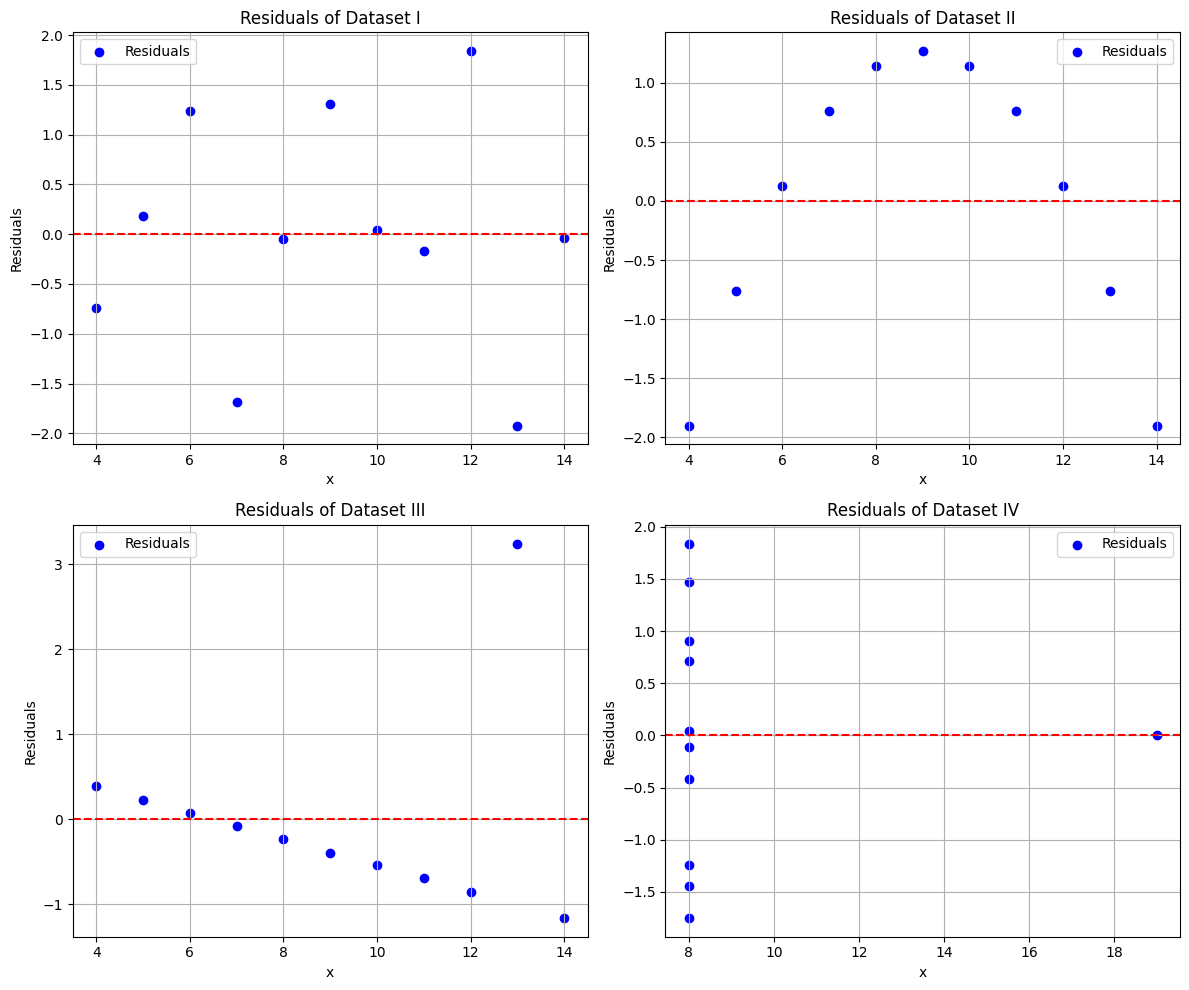

In [31]:
# plot residual with respect to x for all four Datasets
# Load the Anscombe dataset
anscombe_data = sns.load_dataset('anscombe')

# Define the least squares evaluation function
def calculate_residuals(x, y):
    """
    Calculate the residuals for least squares linear regression.

    Parameters:
    - x: The independent variable data (numpy array or list).
    - y: The dependent variable data (numpy array or list).

    Returns:
    - residuals: The residuals for each point in the dataset.
    """
    # Reshape x for sklearn
    x_reshaped = np.array(x).reshape(-1, 1)

    # Create and fit the model
    model = LinearRegression()
    model.fit(x_reshaped, y)

    # Predict y values using the model
    y_pred = model.predict(x_reshaped)

    # Calculate residuals
    residuals = y - y_pred

    return residuals

# Prepare the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
titles = ['Dataset I', 'Dataset II', 'Dataset III', 'Dataset IV']

# Visualize the residuals for each dataset
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    # Filter data for the current dataset
    current_data = anscombe_data[anscombe_data['dataset'] == dataset]
    x = current_data['x']
    y = current_data['y']

    # Calculate residuals
    residuals = calculate_residuals(x, y)

    # Plot the residuals
    axes[i].scatter(x, residuals, color='blue', label='Residuals')

    # Add a horizontal line at y=0 for reference
    axes[i].axhline(y=0, color='red', linestyle='--')

    # Add title and labels
    axes[i].set_title(f'Residuals of {titles[i]}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Residuals')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


The takeaway here is that you should always visualize your datasets before fitting any models to it!